In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import openpyxl
import re
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_ = pd.read_excel('FullSpreadsheets\\CAF v0.1_June 24, 2024_16.35 filtered.xlsx', index_col=0)
df_.head()

Start Date            End Date Response Type     IP Address  \
4 2024-01-28 15:22:18 2024-01-28 17:16:03    IP Address   49.183.47.50   
5 2024-01-24 23:37:38 2024-01-28 17:23:19    IP Address  128.250.0.205   
6 2024-01-28 15:25:24 2024-01-28 17:27:25    IP Address  128.250.0.194   
7 2024-01-28 15:36:24 2024-01-28 17:31:33    IP Address  128.250.0.211   
8 2024-01-28 15:16:05 2024-01-28 17:34:47    IP Address    104.28.90.4   

   Progress  Duration (in seconds)  Finished           Recorded Date  \
4       100                   6825      True 2024-01-28 17:16:05.591   
5       100                 323141      True 2024-01-28 17:23:21.415   
6       100                   7320      True 2024-01-28 17:27:27.359   
7       100                   6908      True 2024-01-28 17:31:35.061   
8       100                   8321      True 2024-01-28 17:34:48.723   

         Response ID Recipient Last Name Recipient First Name  \
4  R_4lymKpTLrH0ye7q                  Li               Zhanxu   
5  R_4LMyueRqpK2PLmU            Mihalcea                Tudor   
6  R_4QYNhAs7U5jDHRD                  Vo                Terry   
7  R_4QbWJe5Ldc9tqjj                Shah               Salman   
8  R_4WCPMv7WxzkHSVj             Edwards              Warrick   

                         Recipient Email  External Data Reference  \
4       zhanxu.li@student.unimelb.edu.au                      NaN   
5  tudor.mihalcea@student.unimelb.edu.au                      NaN   
6        terry.vo@student.unimelb.edu.au                      NaN   
7     salman.shah@student.unimelb.edu.au                      NaN   
8       w.edwards@student.unimelb.edu.au                      NaN   

   Location Latitude  Location Longitude Distribution Channel User Language  \
4           -37.8159            144.9669                email            EN   
5           -37.8159            144.9669                email            EN   
6           -37.8159            144.9669                email            EN   
7           -37.8159            144.9669                email            EN   
8           -37.8159            144.9669                email            EN   

          Date Student Given Name Student Family Name  \
4  29 Jan 2024             Zhanxu                  Li   
5  25 Jan 2024              Tudor            Mihalcea   
6  29 Jan 2024              Terry                  Vo   
7  29 Jan 2024             Salman                Shah   
8  29 Jan 2024            Warrick             Edwards   

                   Student Email Address  Student ID Cohort    Subject  \
4       zhanxu.li@student.unimelb.edu.au     1082018   DDS2  DENT90115   
5  tudor.mihalcea@student.unimelb.edu.au     1384392   DDS2  DENT90116   
6        terry.vo@student.unimelb.edu.au     1387067   DDS2  DENT90115   
7     salman.shah@student.unimelb.edu.au     1377158   DDS2  DENT90115   
8       w.edwards@student.unimelb.edu.au     1383423   DDS2  DENT90115   

  Simulation or Clinic - Selected Choice  \
4                             Simulation   
5                             Simulation   
6                             Simulation   
7                             Simulation   
8                             Simulation   

   Simulation or Clinic - Other (e.g. observations) - Text  \
4                                                NaN         
5                                                NaN         
6                                                NaN         
7                                                NaN         
8                                                NaN         

  Clinic Type - Selected Choice Clinic Type - Other - Text  \
4                           NaN                        NaN   
5                           NaN                        NaN   
6                           NaN                        NaN   
7                           NaN                        NaN   
8                           NaN                        NaN   

  Patient for session Patient Dental Record Number  \

In [2]:
colId = 'Student ID'
colNameG = 'Student Given Name'
colNameF = 'Student Family Name'
colDate = 'Recorded Date'
colCohort = 'Cohort'
colSubject = 'Subject'
colAge = 'Patient Age (Please provide age in numbers only)'
colClinicChoice = 'Simulation or Clinic - Selected Choice'
colClinicOther = 'Simulation or Clinic - Other (e.g. observations) - Text'

colServiceDiag =  'Diagnostic Services'

colServicePPBClinic = 'Preventive, Prophylactic and Bleaching Services - CLINIC'
colServicePPBSim = 'Preventive, Prophylactic and Bleaching Services SIM'
colServicePPB = 'Preventive, Prophylactic and Bleaching Services'
df_[colServicePPB] = df_[colServicePPBClinic].combine_first(df_[colServicePPBSim])
df_.drop([colServicePPBClinic, colServicePPBSim], axis=1, inplace=True)

colServicePerioClinic = 'Periodontics - CLINIC'
colServicePerioSim = 'Periodontics SIM'
colServicePerio = 'Periodontics'
df_[colServicePerio] = df_[colServicePerioClinic].combine_first(df_[colServicePerioSim])
df_.drop([colServicePerioClinic, colServicePerioSim], axis=1, inplace=True)

colServiceOral = 'Oral Surgery SIM and CLINIC'

colServiceEndoSim = 'Endodontics - SIM'
colServiceEndoClinic = 'Endodontics - CLINIC'
colServiceEndo = 'Endodontics'
df_[colServiceEndo] = df_[colServiceEndoClinic].combine_first(df_[colServiceEndoSim])
df_.drop([colServiceEndoClinic, colServiceEndoSim], axis=1, inplace=True)

colServiceRestorClinic = 'Restorative Services - CLINIC'
colServiceRestorSim = 'Restorative Services - SIM'
colServiceRestor = 'Restorative Services'
df_[colServiceRestor] = df_[colServiceRestorClinic].combine_first(df_[colServiceRestorSim])
df_.drop([colServiceRestorClinic, colServiceRestorSim], axis=1, inplace=True)

colServiceProsthoClinic = 'Removable Prosthodontics CLINIC'
colServiceProsthoSim = 'Fixed Prosthodontics - SIM'
colServiceProstho = 'Prosthodontics'
df_[colServiceProstho] = df_[colServiceProsthoClinic].combine_first(df_[colServiceProsthoSim])
df_.drop([colServiceProsthoClinic, colServiceProsthoSim], axis=1, inplace=True)

colServiceGeneral = 'General Services'

colSupervisorChoice = 'Supervisor Name - Selected Choice'
colSupervisorOther = 'Supervisor Name - Other - Text'
colSupervisor = 'Supervisor Name'
df_[colSupervisor] = df_[colSupervisorChoice].combine_first(df_[colSupervisorOther])
df_.drop([colSupervisorChoice, colSupervisorOther], axis=1, inplace=True)
df_.head(3)


Start Date            End Date Response Type     IP Address  \
4 2024-01-28 15:22:18 2024-01-28 17:16:03    IP Address   49.183.47.50   
5 2024-01-24 23:37:38 2024-01-28 17:23:19    IP Address  128.250.0.205   
6 2024-01-28 15:25:24 2024-01-28 17:27:25    IP Address  128.250.0.194   

   Progress  Duration (in seconds)  Finished           Recorded Date  \
4       100                   6825      True 2024-01-28 17:16:05.591   
5       100                 323141      True 2024-01-28 17:23:21.415   
6       100                   7320      True 2024-01-28 17:27:27.359   

         Response ID Recipient Last Name Recipient First Name  \
4  R_4lymKpTLrH0ye7q                  Li               Zhanxu   
5  R_4LMyueRqpK2PLmU            Mihalcea                Tudor   
6  R_4QYNhAs7U5jDHRD                  Vo                Terry   

                         Recipient Email  External Data Reference  \
4       zhanxu.li@student.unimelb.edu.au                      NaN   
5  tudor.mihalcea@student.unimelb.edu.au                      NaN   
6        terry.vo@student.unimelb.edu.au                      NaN   

   Location Latitude  Location Longitude Distribution Channel User Language  \
4           -37.8159            144.9669                email            EN   
5           -37.8159            144.9669                email            EN   
6           -37.8159            144.9669                email            EN   

          Date Student Given Name Student Family Name  \
4  29 Jan 2024             Zhanxu                  Li   
5  25 Jan 2024              Tudor            Mihalcea   
6  29 Jan 2024              Terry                  Vo   

                   Student Email Address  Student ID Cohort    Subject  \
4       zhanxu.li@student.unimelb.edu.au     1082018   DDS2  DENT90115   
5  tudor.mihalcea@student.unimelb.edu.au     1384392   DDS2  DENT90116   
6        terry.vo@student.unimelb.edu.au     1387067   DDS2  DENT90115   

  Simulation or Clinic - Selected Choice  \
4                             Simulation   
5                             Simulation   
6                             Simulation   

   Simulation or Clinic - Other (e.g. observations) - Text  \
4                                                NaN         
5                                                NaN         
6                                                NaN         

  Clinic Type - Selected Choice Clinic Type - Other - Text  \
4                           NaN                        NaN   
5                           NaN                        NaN   
6                           NaN                        NaN   

  Patient for session Patient Dental Record Number  \
4                 NaN                          NaN   
5                 NaN                          NaN   
6                 NaN                          NaN   

   Patient Age (Please provide age in numbers only) Was an interpreter used?  \
4                                               NaN                      NaN   
5                                               NaN                      NaN   
6                                               NaN                      NaN   

  FTA substitute task - Selected Choice FTA substitute task - Other - Text  \
4                                   NaN                                NaN   
5                                   NaN                                NaN   
6                                   NaN                                NaN   

  Role - Selected Choice  Role - Other - Text  \
4               Operator                  NaN   
5               Operator                  NaN   
6               Operator                  NaN   

  How many patients does this form cover?\n\n[If time permits please list the patients and codes e.g: Patient 1 - 114, Patient 2 - 011, 022, 114 etc.]  \
4                                                NaN                                                                                                     
5            

In [3]:
df = df_.copy()
df[colId] = df[colId].astype(int)
rubricQues = ['PS', 'CS', 'TS',	'ES']
df['Recorded Date'] = pd.to_datetime(df['Recorded Date']).dt.date
# before_columns = ['Student ID', 'Student Given Name', 'Student Family Name', 'Recorded Date']
beforeCols = [colId, colNameG, colNameF, colDate]
serviceCols = [colServiceDiag, colServicePPB, colServicePerio, colServiceEndo, colServiceRestor, colServiceProstho, colServiceGeneral]
# after_columns = ['Cohort', 'Subject', 'Clinic Location - Selected Choice',	'Clinic Location - Other - Text', 'Diagnostic Services',
        # 'Restorative Services',	'General Services', 'Preventive, Prophylactic and Bleaching Services', 'Periodontics', 'Endodontics', 'Supervisor Name - Selected Choice',	'Supervisor Name - Other - Text']
afterCols = [colCohort, colSubject, colClinicChoice, colClinicOther] + serviceCols + [colSupervisor]
# for col in rubricQues:
#         df[col] = df[col].str.extract(r'Lvl (\d+)')[0]

In [4]:
df.head()

Start Date            End Date Response Type     IP Address  \
4 2024-01-28 15:22:18 2024-01-28 17:16:03    IP Address   49.183.47.50   
5 2024-01-24 23:37:38 2024-01-28 17:23:19    IP Address  128.250.0.205   
6 2024-01-28 15:25:24 2024-01-28 17:27:25    IP Address  128.250.0.194   
7 2024-01-28 15:36:24 2024-01-28 17:31:33    IP Address  128.250.0.211   
8 2024-01-28 15:16:05 2024-01-28 17:34:47    IP Address    104.28.90.4   

   Progress  Duration (in seconds)  Finished Recorded Date        Response ID  \
4       100                   6825      True    2024-01-28  R_4lymKpTLrH0ye7q   
5       100                 323141      True    2024-01-28  R_4LMyueRqpK2PLmU   
6       100                   7320      True    2024-01-28  R_4QYNhAs7U5jDHRD   
7       100                   6908      True    2024-01-28  R_4QbWJe5Ldc9tqjj   
8       100                   8321      True    2024-01-28  R_4WCPMv7WxzkHSVj   

  Recipient Last Name Recipient First Name  \
4                  Li               Zhanxu   
5            Mihalcea                Tudor   
6                  Vo                Terry   
7                Shah               Salman   
8             Edwards              Warrick   

                         Recipient Email  External Data Reference  \
4       zhanxu.li@student.unimelb.edu.au                      NaN   
5  tudor.mihalcea@student.unimelb.edu.au                      NaN   
6        terry.vo@student.unimelb.edu.au                      NaN   
7     salman.shah@student.unimelb.edu.au                      NaN   
8       w.edwards@student.unimelb.edu.au                      NaN   

   Location Latitude  Location Longitude Distribution Channel User Language  \
4           -37.8159            144.9669                email            EN   
5           -37.8159            144.9669                email            EN   
6           -37.8159            144.9669                email            EN   
7           -37.8159            144.9669                email            EN   
8           -37.8159            144.9669                email            EN   

          Date Student Given Name Student Family Name  \
4  29 Jan 2024             Zhanxu                  Li   
5  25 Jan 2024              Tudor            Mihalcea   
6  29 Jan 2024              Terry                  Vo   
7  29 Jan 2024             Salman                Shah   
8  29 Jan 2024            Warrick             Edwards   

                   Student Email Address  Student ID Cohort    Subject  \
4       zhanxu.li@student.unimelb.edu.au     1082018   DDS2  DENT90115   
5  tudor.mihalcea@student.unimelb.edu.au     1384392   DDS2  DENT90116   
6        terry.vo@student.unimelb.edu.au     1387067   DDS2  DENT90115   
7     salman.shah@student.unimelb.edu.au     1377158   DDS2  DENT90115   
8       w.edwards@student.unimelb.edu.au     1383423   DDS2  DENT90115   

  Simulation or Clinic - Selected Choice  \
4                             Simulation   
5                             Simulation   
6                             Simulation   
7                             Simulation   
8                             Simulation   

   Simulation or Clinic - Other (e.g. observations) - Text  \
4                                                NaN         
5                                                NaN         
6                                                NaN         
7                                                NaN         
8                                                NaN         

  Clinic Type - Selected Choice Clinic Type - Other - Text  \
4                           NaN                        NaN   
5                           NaN                        NaN   
6                           NaN                        NaN   
7                           NaN                        NaN   
8                           NaN                        NaN   

  Patient for session Patient Dental Record Number  \
4                 NaN                          NaN   
5    

In [5]:
def drop_empty_supervisor_id_rows(df):
    # Replace empty strings with NaN to ensure they are treated as missing values
    df['Supervisor signature - Id'].replace('', pd.NA, inplace=True)
    # Drop rows where 'Supervisor signature - Id' is NaN
    df.dropna(subset=['Supervisor signature - Id'], inplace=True)
    return df

def find_mc_columns(df, code=None, role=None):
    # Regex pattern to match 'MC' followed by a digit, specific code, and role
    if code is None and role is None:
        pattern = r'MC\d+'
    elif code is None:
        pattern = rf'MC\d+_{role}'
    elif role is None:
        pattern = rf'{code}_MC\d+'
    else:
        pattern = rf'{code}_MC\d+_{role}'
    
    # Filter columns using the regex pattern
    matched_columns = [col for col in df.columns if re.search(pattern, col)]
    
    return matched_columns

mc_columns = find_mc_columns(df)
print(mc_columns)

def extract_restorative_codes(service_str, location):
    # print(service_str)
    if pd.isna(service_str):
        return []
    
    if location == 'Simulation':
        location = 'SIM'
    else:
        location = 'CLINIC'
    # Extract only codes
    code = re.findall(r'\b(\d+)\b', service_str)
    codes = [(c, location) for c in code]
    return codes
    # Extract codes with possible suffixes like 'SIM' or 'CLINIC'
    # return re.findall(r'\b(\d+)(?:\s(CLINIC|SIM))?\b', service_str)

def split_df_by_codes(df):
    code_dict = {}
    # Iterate over each row in the DataFrame
    for idx, row in df.iterrows():
        # Get codes from 'Restorative Services'
        # print(idx)
        allCodes = []
        for col in serviceCols:
            allCodes += extract_restorative_codes(row[col], row[colClinicChoice])
        # diagnostic_codes = extract_restorative_codes(row['Diagnostic Services'], row['Clinic Location - Selected Choice'])
        # restorative_codes = extract_restorative_codes(row['Restorative Services'], row['Clinic Location - Selected Choice'])
        # # print(restorative_codes)
        # preventive_codes = extract_restorative_codes(row['Preventive, Prophylactic and Bleaching Services'], row['Clinic Location - Selected Choice'])
        # # print(row['Preventive, Prophylactic and Bleaching Services'], preventive_codes)
        # periodontal_codes = extract_restorative_codes(row['Periodontics'], row['Clinic Location - Selected Choice'])
        # endodontic_codes = extract_restorative_codes(row['Endodontics'], row['Clinic Location - Selected Choice'])
        # # Handle 'General Services', assume only 'LA' as a code right now
        # general_codes = [('LA', None)] if 'LA' in str(row['General Services']) else []

        # # Combine and process all codes
        # all_codes = diagnostic_codes + restorative_codes + preventive_codes + general_codes + periodontal_codes + endodontic_codes 
        for code_tuple in allCodes:
            code = code_tuple[0]
            modifier = code_tuple[1] if len(code_tuple) > 1 else None
            key = f"{code}_{modifier}" if modifier else code  # Create a key like '533_CLINIC' or 'LA'

            if key not in code_dict:
                code_dict[key] = []
            code_dict[key].append(idx)
    # print(code_dict)

    
    # Create a DataFrame for each code
    # Filtering columns for each specific code
    for key in code_dict:
        code, modifier = key.split('_') if '_' in key else (key, None)
        relevant_columns = [col for col in mc_columns if code in col and 
                            ((modifier and f"({modifier})" in col) or (not modifier and '(' not in col))]
        # Add non-MC, non-subject-specific columns
        general_columns = [col for col in df.columns if col not in mc_columns and col not in rubricQues]
        # Combine relevant subject columns and general columns
        selected_columns = beforeCols + relevant_columns + rubricQues + afterCols
        # Create a DataFrame for each code using selected columns
        code_dict[key] = df.loc[code_dict[key], selected_columns].copy()
    
    code_dict['All'] = df[beforeCols + mc_columns + rubricQues + afterCols]

    for key, dftest in code_dict.items():
        for col in rubricQues:
            dftest[col] = dftest[col].str.extract(r'Lvl (\d+)')[0]
            dftest[col] = pd.to_numeric(dftest[col], errors='coerce').fillna(0).astype(int)
    
    return code_dict

['011_MC1_student', '011_MC2_student', '011_MC3_student', '011_MC4_student', '011_MC5_student', '011_MC6_student', '011_MC7_student', '011_MC8_student', '011_MC9_student', '011_MC10_student', '011_MC11_student', '011_MC12_student', '011_MC13_student', '011_MC14_student', '011_MC15_student', '011_MC16_student', '011_MC1_supervisor', '011_MC2_supervisor', '011_MC3_supervisor', '011_MC4_supervisor', '011_MC5_supervisor', '011_MC6_supervisor', '011_MC7_supervisor', '011_MC8_supervisor', '011_MC9_supervisor', '011_MC10_supervisor', '011_MC11_supervisor', '011_MC12_supervisor', '011_MC13_supervisor', '011_MC14_supervisor', '011_MC15_supervisor', '011_MC16_supervisor', '012_MC1_student', '012_MC2_student', '012_MC3_student', '012_MC4_student', '012_MC5_student', '012_MC6_student', '012_MC7_student', '012_MC8_student', '012_MC9_student', '012_MC10_student', '012_MC11_student', '012_MC12_student', '012_MC13_student', '012_MC14_student', '012_MC15_student', '012_MC16_student', '012_MC1_superviso

In [6]:
codeDict = split_df_by_codes(df)
# codeDict

In [7]:
print(codeDict.keys())
codeDict.pop('24_SIM')
codeDict.pop('39_SIM')
codeDict.pop('23_SIM')
codeDict.pop('25_SIM')

dict_keys(['24_SIM', '39_SIM', '23_SIM', '25_SIM', '114_SIM', '221_SIM', '222_SIM', '011_CLINIC', '114_CLINIC', '18_CLINIC', '23_CLINIC', '941_CLINIC', '141_CLINIC', '22_SIM', '16_SIM', '161_SIM', '17_SIM', '022_CLINIC', '121_CLINIC', '941_SIM', '012_CLINIC', '26_SIM', '221_CLINIC', '012_SIM', '115_CLINIC', '222_CLINIC', '161_CLINIC', '22_CLINIC', '524_SIM', '578_SIM', '532_SIM', '523_SIM', '533_SIM', '531_SIM', '011_SIM', '18_SIM', '534_SIM', '061_CLINIC', '511_CLINIC', '522_SIM', '123_CLINIC', '142_CLINIC', '141_SIM', '577_SIM', '131_CLINIC', '574_SIM', '411_SIM', '521_SIM', '19_CLINIC', '16_CLINIC', '111_CLINIC', '24_CLINIC', '111_SIM', '511_SIM', '535_SIM', '513_SIM', '165_CLINIC', '514_SIM', '575_SIM', '525_SIM', '131_SIM', '17_CLINIC', '113_SIM', '013_CLINIC', '533_CLINIC', '577_CLINIC', '532_CLINIC', '521_CLINIC', '522_CLINIC', '523_CLINIC', 'All'])


,Student ID,Student Given Name,Student Family Name,Recorded Date,525_MC1_student (SIM),525_MC2_student (SIM),525_MC3_student (SIM),525_MC4_student (SIM),525_MC5_student (SIM),525_MC6_student (SIM),525_MC7_student (SIM),525_MC8_student (SIM),525_MC9_student (SIM),525_MC10_student (SIM),525_MC11_student (SIM),525_MC12_student (SIM),525_MC13_student (SIM),525_MC1_supervisor (SIM),525_MC2_supervisor (SIM),525_MC3_supervisor (SIM),525_MC4_supervisor (SIM),525_MC5_supervisor (SIM),525_MC6_supervisor (SIM),525_MC7_supervisor (SIM),525_MC8_supervisor (SIM),525_MC9_supervisor (SIM),525_MC10_supervisor (SIM),525_MC11_supervisor (SIM),525_MC12_supervisor (SIM),525_MC13_supervisor (SIM),586_MC25_student (SIM),586_MC25_supervisor (SIM),587_MC25_student (SIM),587_MC25_supervisor (SIM),PS,CS,TS,ES,Cohort,Subject,Simulation or Clinic - Selected Choice,Simulation or Clinic - Other (e.g. observations) - Text,Diagnostic Services,"Preventive, Prophylactic and Bleaching Services",Periodontics,Endodontics,Restorative Services,Prosthodontics,General Services,Supervisor Name
85,1330715,Fabian,Walker,2024-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0,1,DDS2,DENT90115,Simulation,NaN,NaN,NaN,NaN,NaN,"25,39",NaN,NaN,NaN


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [9]:
codeDict['531_SIM'].head()

,Student ID,Student Given Name,Student Family Name,Recorded Date,531_MC1_student (SIM),531_MC2_student (SIM),531_MC3_student (SIM),531_MC4_student (SIM),531_MC5_student (SIM),531_MC6_student (SIM),531_MC7_student (SIM),531_MC8_student (SIM),531_MC9_student (SIM),531_MC10_student (SIM),531_MC11_student (SIM),531_MC1_supervisor (SIM),531_MC2_supervisor (SIM),531_MC3_supervisor (SIM),531_MC4_supervisor (SIM),531_MC5_supervisor (SIM),531_MC6_supervisor (SIM),531_MC7_supervisor (SIM),531_MC8_supervisor (SIM),531_MC9_supervisor (SIM),531_MC10_supervisor (SIM),531_MC11_supervisor (SIM),PS,CS,TS,ES,Cohort,Subject,Simulation or Clinic - Selected Choice,Simulation or Clinic - Other (e.g. observations) - Text,Diagnostic Services,"Preventive, Prophylactic and Bleaching Services",Periodontics,Endodontics,Restorative Services,Prosthodontics,General Services,Supervisor Name
605,1280725,Rohan,Cornelio,2024-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,3,2,BOH2,ORAL20005,Simulation,NaN,NaN,NaN,NaN,NaN,531 SIM Adhesive restoration – one surface – p...,NaN,NaN,NaN
1921,111,a,a,2024-03-19,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,2,4,4,DDS1,DENT90141,Simulation,NaN,NaN,161 CLINIC Fissure and/or tooth surface sealing,NaN,NaN,531 SIM Adhesive restoration – one surface – p...,NaN,NaN,Aditi Bhide
1928,111,a,a,2024-03-20,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Not Reviewed,No,Yes,Yes,2,2,2,1,DDS1,DENT90141,Simulation,NaN,NaN,161 CLINIC Fissure and/or tooth surface sealing,NaN,NaN,531 SIM Adhesive restoration – one surface – p...,NaN,NaN,Aditi Bhide
1935,111,a,a,2024-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2,2,DDS1,DENT90141,Simulation,NaN,NaN,161 CLINIC Fissure and/or tooth surface sealing,NaN,NaN,531 SIM Adhesive restoration – one surface – p...,NaN,NaN,Aditi Bhide
2167,1419850,Zahra,Khatibi,2024-03-25,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,2,4,3,BOH2,ORAL20005,Simulation,NaN,NaN,NaN,NaN,NaN,531 SIM Adhesive restoration – one surface – p...,NaN,NaN,Laura James


['531_MC1_supervisor (SIM)', '531_MC2_supervisor (SIM)', '531_MC3_supervisor (SIM)', '531_MC4_supervisor (SIM)', '531_MC5_supervisor (SIM)', '531_MC6_supervisor (SIM)', '531_MC7_supervisor (SIM)', '531_MC8_supervisor (SIM)', '531_MC9_supervisor (SIM)', '531_MC10_supervisor (SIM)', '531_MC11_supervisor (SIM)']
Mean Squared Error: 58.65514262819535


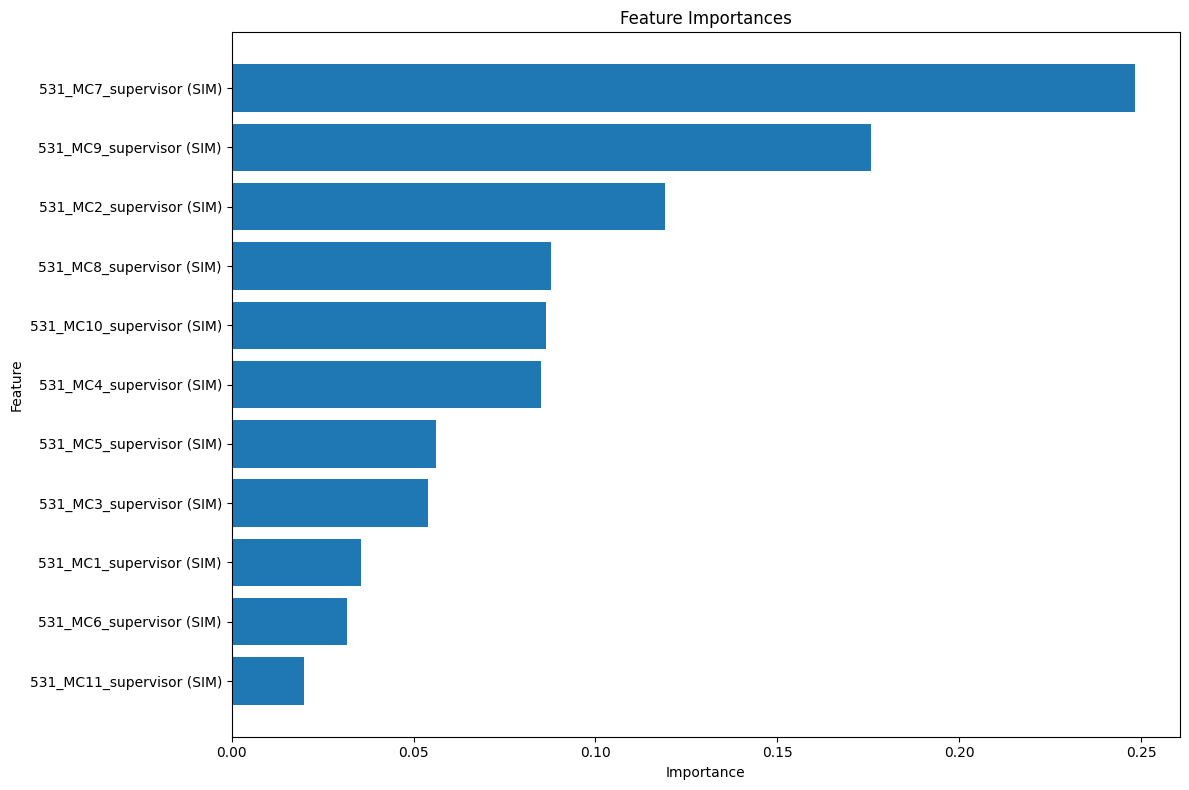

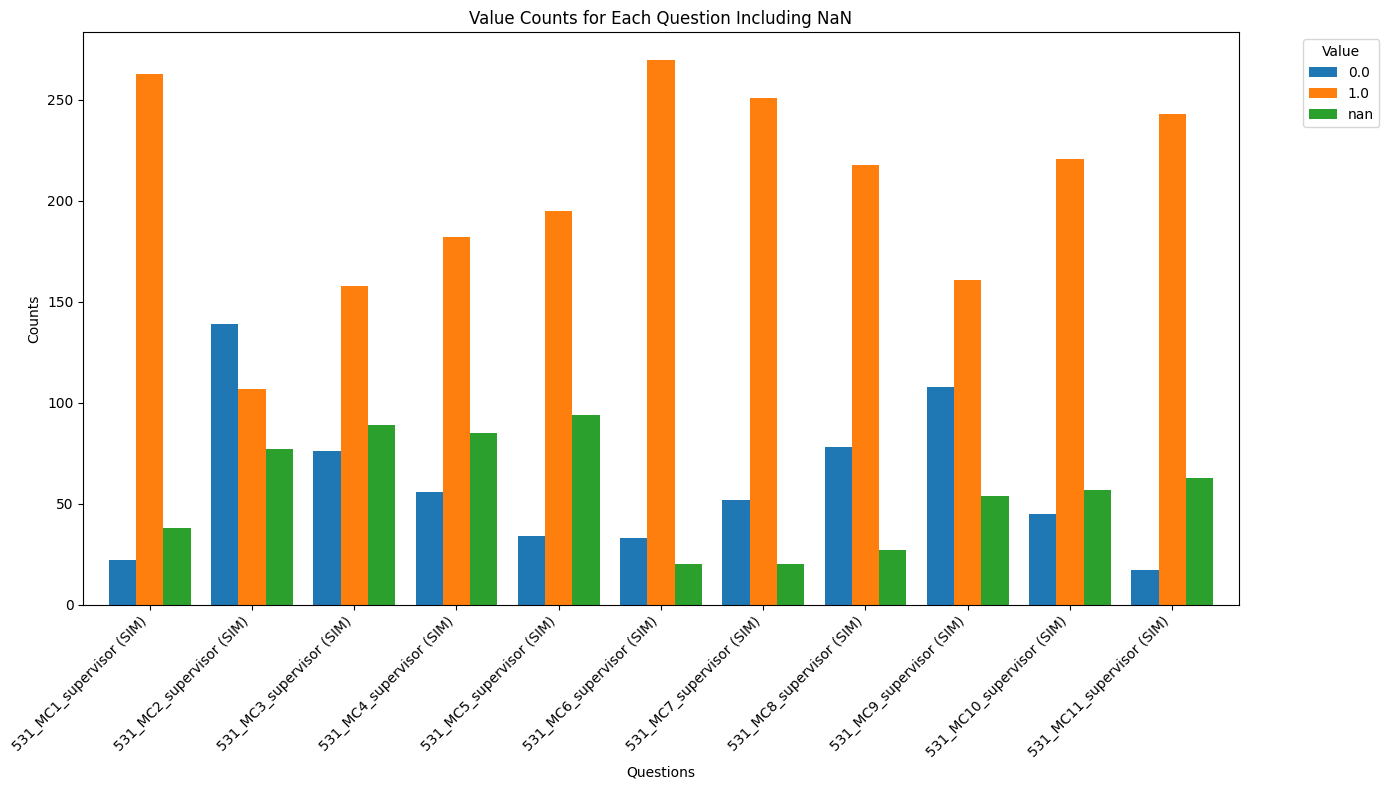

In [15]:
irtFolder = 'FullSpreadsheets\\IRT'
def getImportance(code):
    newDf = codeDict[code]
    newDf.replace({'Yes': 1, 'No': 0, 'Not Assessed': np.nan, 'Not Reviewed': np.nan}, inplace=True)
    mc_columns_test = find_mc_columns(newDf)
    mc_columns_test = [col for col in mc_columns_test if 'supervisor' in col]
    newDf = newDf[mc_columns_test + rubricQues]
    print(mc_columns_test)
    colmcTotal = 'MC Total'
    colmcTotalPossible = 'MC total possible'
    newDf[colmcTotal] = newDf[mc_columns_test].sum(axis=1, skipna=True).astype(int)
    newDf[colmcTotalPossible] = newDf[mc_columns_test].count(axis=1)
    newDf = newDf[(newDf[colmcTotalPossible]>5)]
    
    colmcPercent= 'MC %'
    newDf[colmcPercent] = (newDf[colmcTotal]/newDf[colmcTotalPossible]*100)
    newDf.to_csv(f'{irtFolder}\\{code}.csv')
    # Split the data into training and testing sets
    X = newDf[mc_columns_test]
    y = newDf[colmcPercent]

    # for col in rubricQues:
    #     newDf2 = newDf[newDf[col].notnull()]
    #     X = newDf2[mc_columns_test]
    #     y= newDf2[col]
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

    # Train a Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict and evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    # Get feature importances
    feature_importances = model.feature_importances_
    feature_names = X.columns

    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)


    # Plot the feature importances
    plt.figure(figsize=(12, 8))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importances')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # Get counts of each type of value
    value_counts_dict = {}
    for column in X.columns:
        value_counts_dict[column] = X[column].value_counts(dropna=False)

    # # Display the value counts
    # for column, value_counts in value_counts_dict.items():
    #     print(f"Value counts for {column}:\n{value_counts}\n")

    # Convert value counts dictionary to a DataFrame
    value_counts_df = pd.DataFrame(value_counts_dict)

    # Transpose the DataFrame for plotting
    value_counts_df = value_counts_df.T
    value_counts_df.columns = value_counts_df.columns.astype(str)  # Ensure column names are strings for plotting
    # Plotting the grouped bar chart
    ax = value_counts_df.plot(kind='bar', figsize=(14, 8), width=0.8)
    plt.title('Value Counts for Each Question Including NaN')
    plt.xlabel('Questions')
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Value', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Show the plot
    plt.show()

getImportance('531_SIM')
# getImportance
# for code in codeDict.keys():
#     getImportance(code)


Not marking each thing as it is. Bias with MC items v/s PS, TS, ES, CS. Are the assessors using the most predictive questions as a proxy.

Create a table for proportion of not assessed, one parameter model of IRT. Infit, itemfit and outfit statistics to see how well the model works. WLE reliability. 
- Common checklist items among the codes. 
- IRT for each code and each supervisor to see how much luck is involved.
- Find the most items are students are completing and which students are not. 